In [1]:
# Load Libraries

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Loading Data

df = pd.read_csv('Data/Shill_Bidding_Dataset_With_Head.csv')
print(df.shape)


(6321, 13)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [4]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df)

number of duplicate rows:  Empty DataFrame
Columns: [Record_ID, Auction_ID, Bidder_ID, Bidder_Tendency, Bidding_Ratio, Successive_Outbidding, Last_Bidding, Auction_Bids, Starting_Price_Average, Early_Bidding, Winning_Ratio, Auction_Duration, Class]
Index: []


In [5]:
df = pd.read_csv('Data/Shill_Bidding_Dataset_With_Head.csv', index_col='Record_ID')
print(df.shape)
df.head(5)

(6321, 12)


,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [6]:
df = df.drop(columns = ['Bidder_ID'])
df.head(5)

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,
1,732,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
2,732,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
3,732,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
4,732,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
5,900,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [7]:
df.Auction_ID.value_counts()



Auction_ID
589     26
1872    26
256     24
658     24
2498    23
        ..
1756     1
548      1
1971     1
458      1
2329     1
Name: count, Length: 807, dtype: int64

In [8]:
df = df.drop(columns = ['Auction_ID'])

In [9]:
df.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [10]:
from sklearn.preprocessing import MinMaxScaler


df['Auction_Duration'] = MinMaxScaler().fit_transform(df[['Auction_Duration']])
df.head(5)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,
1,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,0.444444,0
2,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,0.444444,0
3,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,0.444444,0
4,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,0.444444,0
5,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,0.666667,0


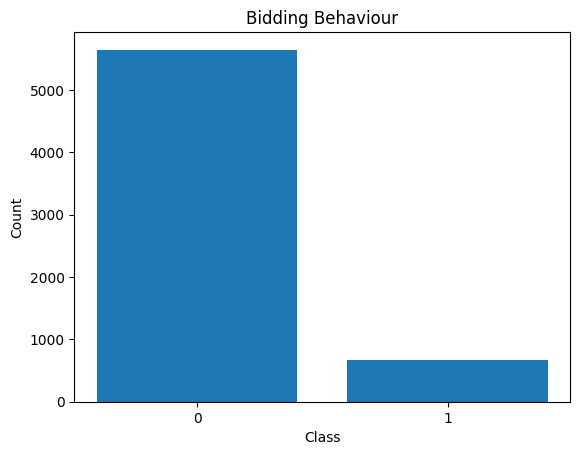

Class
0    5646
1     675
Name: count, dtype: int64


In [11]:
import matplotlib.pyplot as plt

class_counts = df['Class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index.astype(str), class_counts.values)

# Set the title and labels
plt.title('Bidding Behaviour')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

print(class_counts)

In [12]:
# Splitting the dataset into input variables X and target variable y

X = df.drop(['Class'], axis=1)
y = df.Class

print(X.head())
print(y[0:5])

           Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
Record_ID                                                          
1                 0.200000       0.400000                    0.0   
2                 0.024390       0.200000                    0.0   
3                 0.142857       0.200000                    0.0   
4                 0.100000       0.200000                    0.0   
5                 0.051282       0.222222                    0.0   

           Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
Record_ID                                                                      
1              0.000028           0.0                0.993593       0.000028   
2              0.013123           0.0                0.993593       0.013123   
3              0.003042           0.0                0.993593       0.003042   
4              0.097477           0.0                0.993593       0.097477   
5              0.001318           0.0      

In [13]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=1)

print("Size of training X: ", X_train.shape)

X_validation, X_test, y_validation, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=1)

print("Size of validation X: ", X_validation.shape)
print("Size of training X: ", X_test.shape)

Size of training X:  (4424, 9)
Size of validation X:  (948, 9)
Size of training X:  (949, 9)


In [20]:
clf1 = SVC()

clf1 = clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_validation)

print("Accuracy: ", metrics.accuracy_score(y_validation, y_pred1))

Accuracy:  0.9757383966244726


In [47]:
y_pred1 = clf1.predict(X_validation)

print("Accuracy (Initial Model): ", metrics.accuracy_score(y_validation, y_pred1))

Accuracy (Initial Model):  0.9757383966244726


In [48]:
clf2 = SVC(kernel = 'linear')

clf2 = clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_validation)

print("Accuracy (Linear Kernel): ", metrics.accuracy_score(y_validation, y_pred2))

Accuracy (Linear Kernel):  0.9767932489451476


Size of training X:  (4424, 9)
Size of validation X:  (948, 9)
Size of training X:  (949, 9)
Accuracy:  0.9757383966244726
Accuracy:  0.9767932489451476


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [28]:
# Create and train a new SVM model with the best parameters
tuned_clf = SVC(C=100, gamma=1, kernel='rbf')
tuned_clf.fit(X_train, y_train)

# Predict on the validation set
y_pred_tuned = tuned_clf.predict(X_validation)

print("Accuracy (Tuned Model):", metrics.accuracy_score(y_validation, y_pred_tuned))


Accuracy (Tuned Model): 0.9936708860759493


In [22]:
print("Accuracy (Initial Model): ", metrics.accuracy_score(y_validation, y_pred1))
print("Accuracy (Linear Kernel): ", metrics.accuracy_score(y_validation, y_pred2))
print("Accuracy (Tuned Model):", accuracy_tuned)

Accuracy (Initial Model):  0.9757383966244726
Accuracy (Linear Kernel):  0.9767932489451476
Accuracy (Tuned Model): 0.9936708860759493


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       860
           1       0.80      0.99      0.88        88

    accuracy                           0.98       948
   macro avg       0.90      0.98      0.93       948
weighted avg       0.98      0.98      0.98       948

Axes(0.125,0.11;0.775x0.77)


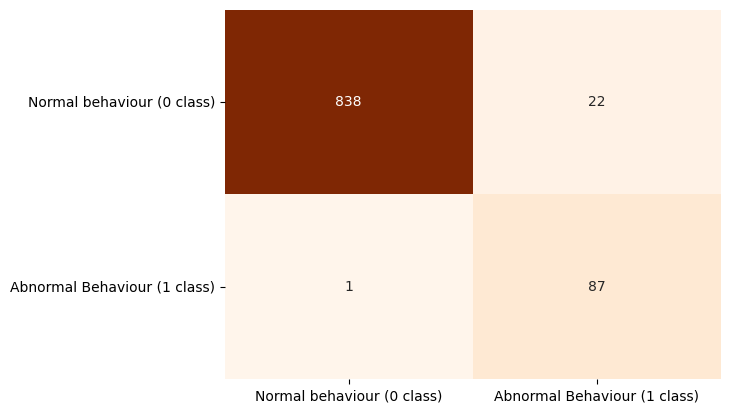

In [45]:
from sklearn.model_selection import cross_val_score     
from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

print(classification_report(y_validation, y_pred1))
print(sns.heatmap(confusion_matrix(y_validation, y_pred1), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Abnormal Behaviour (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Abnormal Behaviour (1 class)'],                  
                 cbar=False, cmap='Oranges'))

We can observe that the model perfomed very well. Over 860 **0 class** values 22 were predicted as False Positive and over 88 **1 class** values 1 was predicted as False Negative, which is a very good result.


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       860
           1       0.80      1.00      0.89        88

    accuracy                           0.98       948
   macro avg       0.90      0.99      0.94       948
weighted avg       0.98      0.98      0.98       948

Axes(0.125,0.11;0.775x0.77)


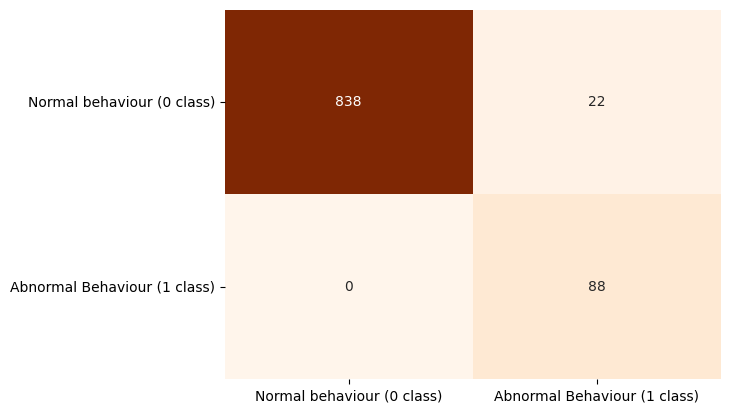

In [44]:
print(classification_report(y_validation, y_pred2))
print(sns.heatmap(confusion_matrix(y_validation, y_pred2), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Abnormal Behaviour (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Abnormal Behaviour (1 class)'],                  
                 cbar=False, cmap='Oranges'))

We can observe that the model perfomed very well. Over 860 **0 class** values 22 were predicted as False Positive and over 88 **1 class** values none were predicted as False Negative, which is a very good result.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       0.97      0.97      0.97        88

    accuracy                           0.99       948
   macro avg       0.98      0.98      0.98       948
weighted avg       0.99      0.99      0.99       948

Axes(0.125,0.11;0.775x0.77)


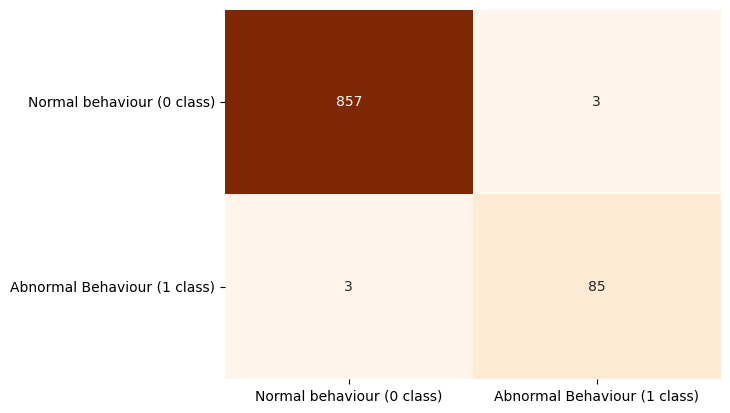

In [46]:
print(classification_report(y_validation, y_pred_tuned))
print(sns.heatmap(confusion_matrix(y_validation, y_pred_tuned), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Abnormal Behaviour (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Abnormal Behaviour (1 class)'],                  
                 cbar=False, cmap='Oranges'))


We can obserse that the model perfomed very well. Over 860 **0 class** values 3 were predicted as False Positive and over 88 **1 class** values only 3 were predicted as False Negative, which is a very good result.
